# Breast Cancer Detection AI
An advanced ensemble-based machine learning system for breast cancer diagnosis with explainability, Streamlit interface, and GenAI-powered reporting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap

import warnings
warnings.filterwarnings('ignore')


##  Load and Explore Data

In [12]:
# Assuming CSV is inside /data folder
df = pd.read_csv("E:\Breast_Cancer_Prediction\data\data (1).csv")
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

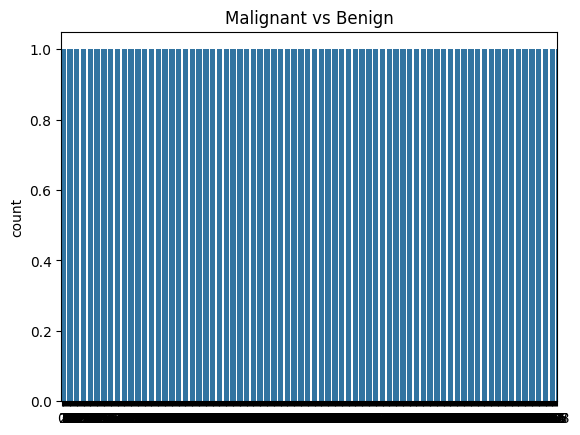

In [14]:
sns.countplot(df['diagnosis'])
plt.title('Malignant vs Benign')
plt.show()


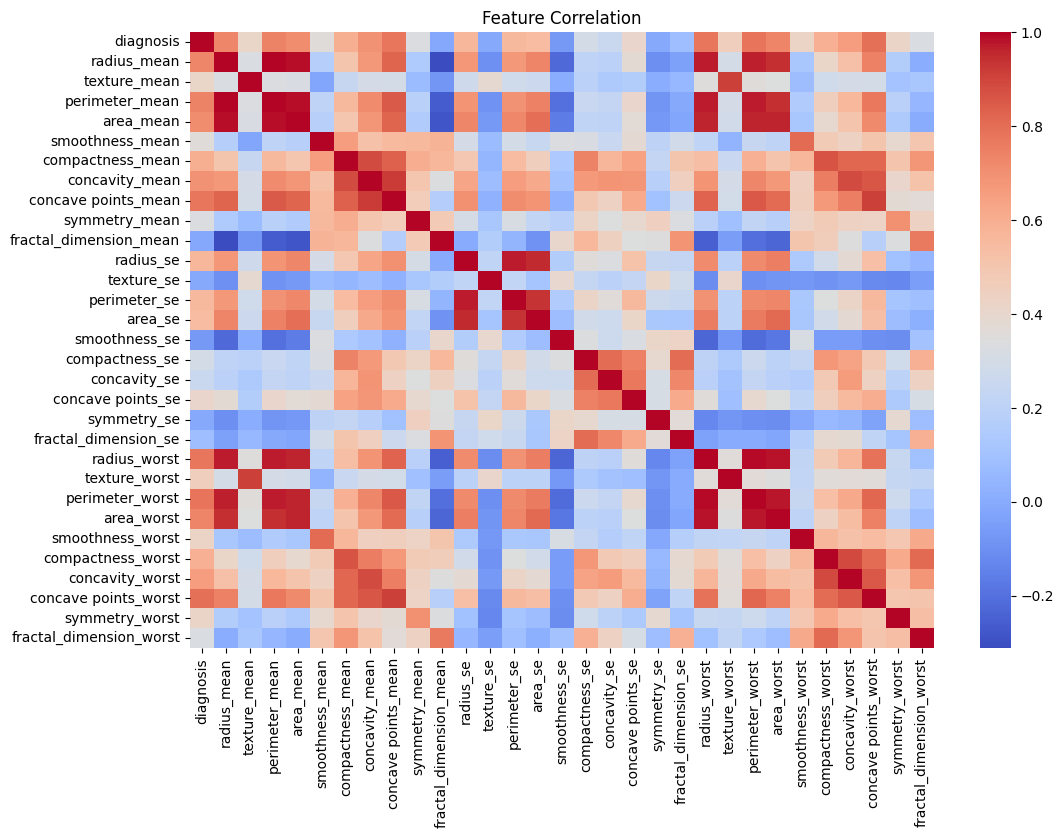

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


## Feature Engineering & Data Split

In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Classifier

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## XGBoost Classifier

In [31]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Model Explainability with SHAP

In [27]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
print(type(shap_values))
print(len(shap_values))
print("shap_values[0].shape:", shap_values[0].shape)
print("shap_values[1].shape:", shap_values[1].shape)
print("X_test_df.shape:", X_test_df.shape)


<class 'numpy.ndarray'>
114
shap_values[0].shape: (30, 2)
shap_values[1].shape: (30, 2)
X_test_df.shape: (114, 30)


## Streamlit App Hooks

In [32]:
import joblib
joblib.dump(rf, '../models/random_forest_model.pkl')
joblib.dump(xgb, '../models/xgboost_model.pkl')


['../models/xgboost_model.pkl']

## GenAI-powered Reporting Setup

In [33]:
# Placeholder function for future LLM integration
def generate_report(summary_text):
    print("🤖 Generating personalized report using LLM API...")
    print("Summary:", summary_text)

sample_summary = classification_report(y_test, y_pred_xgb)
generate_report(sample_summary)


🤖 Generating personalized report using LLM API...
Summary:               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

